# Initialization

Training a neural network requires specifying an initial value of the weights. A well-chosen initialization method helps the learning process.

A well-chosen initialization can:
- Speed up the convergence of gradient descent
- Increase the odds of gradient descent converging to a lower training (and generalization) error 

Let's get started!

## Packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Loading the dataset
For this classifier, you want to separate the blue dots from the red dots.

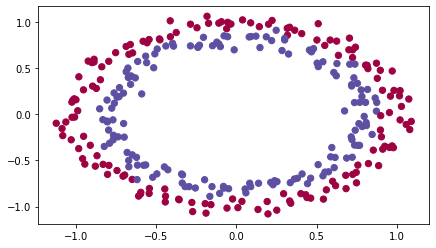

In [5]:
train_X, train_Y, test_X, test_Y = load_dataset()

## Neural Network Model

We'll use a 3-layer neural network (already implemented). These are the initialization methods we'll experiment with: 
- *Zeros initialization* --  setting `initialization = "zeros"` in the input argument.
- *Random initialization* -- setting `initialization = "random"` in the input argument. This initializes the weights to large random values.  
- *He initialization* -- setting `initialization = "he"` in the input argument. This initializes the weights to random values scaled according to a paper by He et al., 2015. 

In [6]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (containing 0 for red dots; 1 for blue dots), of shape (1, number of examples)
    learning_rate -- learning rate for gradient descent 
    num_iterations -- number of iterations to run gradient descent
    print_cost -- if True, print the cost every 1000 iterations
    initialization -- flag to choose which initialization to use ("zeros","random" or "he")
    
    Returns:
    parameters -- parameters learnt by the model
    """
        
    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # Initialize parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    # Loop (gradient descent)

    for i in range(num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

## Zero Initiation
There are two types of parameters to initialize in a neural network:
- the weight matrices $(W^{[1]}, W^{[2]}, W^{[3]}, ..., W^{[L-1]}, W^{[L]})$
- the bias vectors $(b^{[1]}, b^{[2]}, b^{[3]}, ..., b^{[L-1]}, b^{[L]})$

We'll start by implementing the following function to initialize all parameters to zeros.

In [7]:
def initialize_parameters_zeros(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    parameters = {}
    L = len(layers_dims)            # number of layers in the network
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

Run the following code to train your model on 15,000 iterations using zeros initialization.

Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


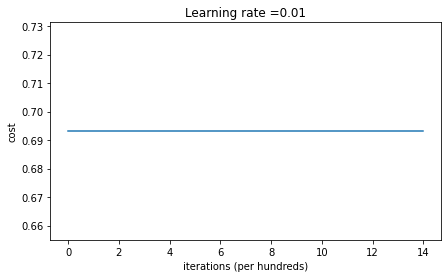

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [8]:
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

The performance is terrible, the cost doesn't decrease, and the algorithm performs no better than random guessing. Why? Take a look at the details of the predictions and the decision boundary:

In [9]:
print ("predictions_train = " + str(predictions_train))
print ("predictions_test = " + str(predictions_test))

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


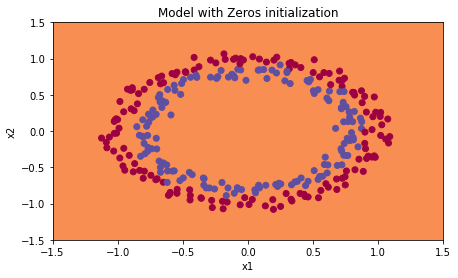

In [10]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

__Note__: For sake of simplicity calculations below are done using only one example at a time.

Since the weights and biases are zero, multiplying by the weights creates the zero vector which gives 0 when the activation function is ReLU. As `z = 0`

$$a = ReLU(z) = max(0, z) = 0$$

At the classification layer, where the activation function is sigmoid we then get (for either input): 

$$\sigma(z) = \frac{1}{ 1 + e^{-(z)}} = \frac{1}{2} = y_{pred}$$

As for every example we are getting a 0.5 chance of it being true our cost function becomes helpless in adjusting the weights.

The loss function:
$$ \mathcal{L}(a, y) =  - y  \ln(y_{pred}) - (1-y)  \ln(1-y_{pred})$$

For `y=1`, `y_pred=0.5` it becomes:

$$ \mathcal{L}(0, 1) =  - (1)  \ln(\frac{1}{2}) = 0.6931471805599453$$

For `y=0`, `y_pred=0.5` it becomes:

$$ \mathcal{L}(0, 0) =  - (1)  \ln(\frac{1}{2}) = 0.6931471805599453$$

As you can see with the prediction being 0.5 whether the actual (`y`) value is 1 or 0 you get the same loss value for both, so none of the weights get adjusted and you are stuck with the same old value of the weights. 

This is why you can see that the model is predicting 0 for every example.

## Random Initialization
To break symmetry, initialize the weights randomly. Following random initialization, each neuron can then proceed to learn a different function of its inputs. We'll see what happens when the weights are initialized randomly, but to very large values.

In [12]:
def initialize_parameters_random(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    parameters = {}
    L = len(layers_dims)            # integer representing the number of layers
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * 10
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))

    return parameters

Run the following code to train your model on 15,000 iterations using random initialization.

D:\Google Drive\EDUCAÇÃO\CURSOS\DEEPLEARNING.AI\Deep Learning\2 - Improving Deep Neural Networks\utils.py:17: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))
D:\Google Drive\EDUCAÇÃO\CURSOS\DEEPLEARNING.AI\Deep Learning\2 - Improving Deep Neural Networks\utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
D:\Google Drive\EDUCAÇÃO\CURSOS\DEEPLEARNING.AI\Deep Learning\2 - Improving Deep Neural Networks\utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 0: inf
Cost after iteration 1000: 0.3859208405775744
Cost after iteration 2000: 0.27609395597669467
Cost after iteration 3000: 0.2676333376184553
Cost after iteration 4000: 0.26175719017097226
Cost after iteration 5000: 0.2542059416021156
Cost after iteration 6000: 0.24991156362577985
Cost after iteration 7000: 0.24308387185080857
Cost after iteration 8000: 0.22017947111699537
Cost after iteration 9000: 0.21723813048812154
Cost after iteration 10000: 0.21486675689630305
Cost after iteration 11000: 0.21276327679953963
Cost after iteration 12000: 0.21091704361788152
Cost after iteration 13000: 0.20929966858472138
Cost after iteration 14000: 0.20786739625625186


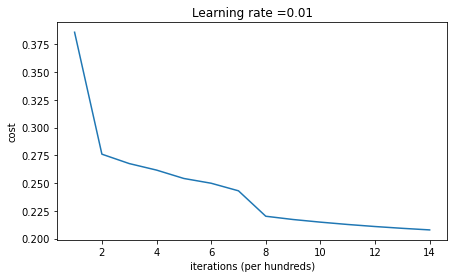

On the train set:
Accuracy: 0.8833333333333333
On the test set:
Accuracy: 0.85


In [13]:
parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

If you see "inf" as the cost after the iteration 0, this is because of numerical roundoff. A more numerically sophisticated implementation would fix this, but for the purposes of this notebook, it isn't really worth worrying about.

In any case, we've now broken the symmetry, and this gives noticeably better accuracy than before. The model is no longer outputting all 0s. Progress!

In [14]:
print (predictions_train)
print (predictions_test)

[[1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0
  0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0
  0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0
  0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1
  1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0
  1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1
  1 1 0 1 0 0 0 1 1 1 1 0]]
[[1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1
  0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0]]


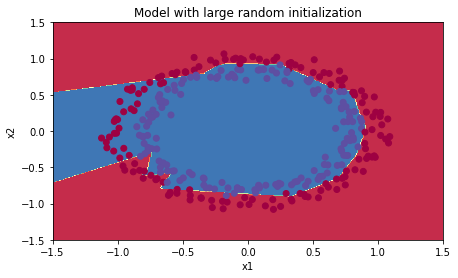

In [15]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**Observations**:
- The cost starts very high. This is because with large random-valued weights, the last activation (sigmoid) outputs results that are very close to 0 or 1 for some examples, and when it gets that example wrong it incurs a very high loss for that example. Indeed, when $\log(a^{[3]}) = \log(0)$, the loss goes to infinity.
- Poor initialization can lead to vanishing/exploding gradients, which also slows down the optimization algorithm. 
- If you train this network longer you will see better results, but initializing with overly large random numbers slows down the optimization.
    
**In summary**:
- Initializing weights to very large random values doesn't work well. 
- Initializing with small random values should do better. The important question is, how small should be these random values be? Let's find out up next!

## He Initialization

Finally, try "He Initialization"; this is named for the first author of He et al., 2015. (If you have heard of "Xavier initialization", this is similar except Xavier initialization uses a scaling factor for the weights $W^{[l]}$ of `sqrt(1./layers_dims[l-1])` where He initialization would use `sqrt(2./layers_dims[l-1])`.)

In [16]:
def initialize_parameters_he(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
     
    for l in range(1, L + 1):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * np.sqrt(2./layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        
    return parameters

Run the following code to train your model on 15,000 iterations using He initialization.

Cost after iteration 0: 0.7351969069284359
Cost after iteration 1000: 0.6823778457312657
Cost after iteration 2000: 0.6685597786807579
Cost after iteration 3000: 0.6573756333002869
Cost after iteration 4000: 0.6416076089401115
Cost after iteration 5000: 0.6183813714012639
Cost after iteration 6000: 0.5863474772569652
Cost after iteration 7000: 0.5396701382844274
Cost after iteration 8000: 0.4858654238144289
Cost after iteration 9000: 0.3930083747687299
Cost after iteration 10000: 0.28832213259406325
Cost after iteration 11000: 0.2122780137954851
Cost after iteration 12000: 0.1612397901266903
Cost after iteration 13000: 0.12698630651894813
Cost after iteration 14000: 0.1039130020318636


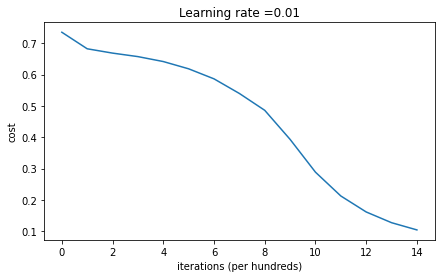

On the train set:
Accuracy: 0.99
On the test set:
Accuracy: 0.94


In [17]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

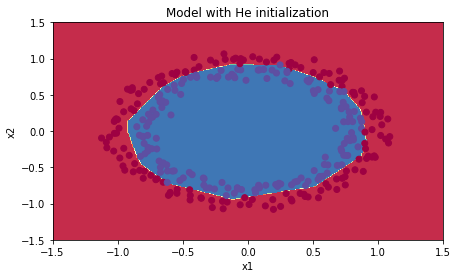

In [18]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

## Conclusions
You've tried three different types of initializations. For the same number of iterations and same hyperparameters, the comparison is:

<table> 
    <tr>
        <td>
            <b>Model</b>
        </td>
        <td>
            <b>Train accuracy</b>
        </td>
        <td>
            <b>Problem/Comment</b>
        </td>
    </tr>
        <td>
        3-layer NN with zeros initialization
        </td>
        <td>
        50%
        </td>
        <td>
        fails to break symmetry
        </td>
    <tr>
        <td>
        3-layer NN with large random initialization
        </td>
        <td>
        83%
        </td>
        <td>
        too large weights 
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with He initialization
        </td>
        <td>
        99%
        </td>
        <td>
        recommended method
        </td>
    </tr>
</table> 